In [112]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

In [113]:
# Paleta

AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'

In [114]:
df_pib = pd.read_csv(
    r'C:\Estudos\alura\data-science\11-dataviz\dados\pib_br_2002_2020_estados.csv',
    encoding='UTF-8' # ISO-8859-1 | latin1 | UTF-8
)

In [115]:
df_pib.head(3)

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199


In [116]:
df_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ano                513 non-null    int64 
 1   sigla_uf           513 non-null    object
 2   regiao             513 non-null    object
 3   pib                513 non-null    int64 
 4   impostos_liquidos  513 non-null    int64 
 5   va                 513 non-null    int64 
 6   va_agropecuaria    513 non-null    int64 
 7   va_industria       513 non-null    int64 
 8   va_servicos        513 non-null    int64 
 9   va_adespss         513 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 40.2+ KB


In [117]:
df_pib_2020 = df_pib.copy(deep=True)

df_pib_2020 = df_pib_2020.query("ano == 2020").set_index('sigla_uf')
df_pib_2020 = df_pib_2020.sort_values(by='pib', ascending=False)[['pib']]

df_pib_2020.head(n=5)

,pib
sigla_uf,
SP,2377638979835
RJ,753823710636
MG,682786116407
PR,487930593779
RS,470941846057


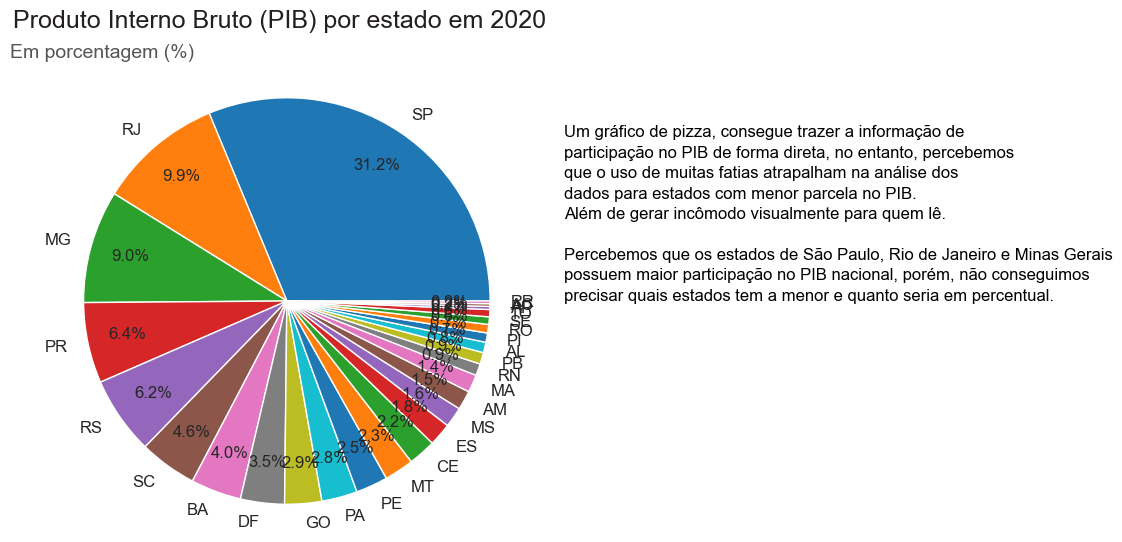

In [118]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.pie(data=df_pib_2020, x='pib',
       labels=df_pib_2020.index,
       autopct='%.1f%%', radius=1.1,
       pctdistance=0.8, textprops={'size': 12})

plt.suptitle('Produto Interno Bruto (PIB) por estado em 2020', size=18, color=CINZA1)
plt.title('Em porcentagem (%)', fontsize=14, color=CINZA3, pad=15,
          x=0.1, y=0.98)

ax.text(1.1, 0.5,
         'Um gráfico de pizza, consegue trazer a informação de\n'
         'participação no PIB de forma direta, no entanto, percebemos\n'
         'que o uso de muitas fatias atrapalham na análise dos\n'
         'dados para estados com menor parcela no PIB.\n'
         'Além de gerar incômodo visualmente para quem lê.\n\n'
         'Percebemos que os estados de São Paulo, Rio de Janeiro e Minas Gerais\n'
         'possuem maior participação no PIB nacional, porém, não conseguimos\n'
         'precisar quais estados tem a menor e quanto seria em percentual.',
         fontsize=12,
         linespacing=1.45,
         color='black', transform= ax.transAxes)

plt.show()

In [119]:
df_pib_2002 = df_pib.query('ano == 2002')[['regiao', 'pib']]
df_pib_2020 = df_pib.query('ano == 2020')[['regiao', 'pib']]

df_pib_2002 = df_pib_2002.groupby(
    by='regiao'
).agg('sum').sort_values(by='pib', ascending=False)

df_pib_2020 = df_pib_2020.groupby(
    by='regiao'
).agg('sum').sort_values(by='pib', ascending=False)

# display(df_pib_2002, df_pib_2020)

In [120]:
config = {'size': 12, 'fontweight': 'bold', 'color': r'#ffffff'}

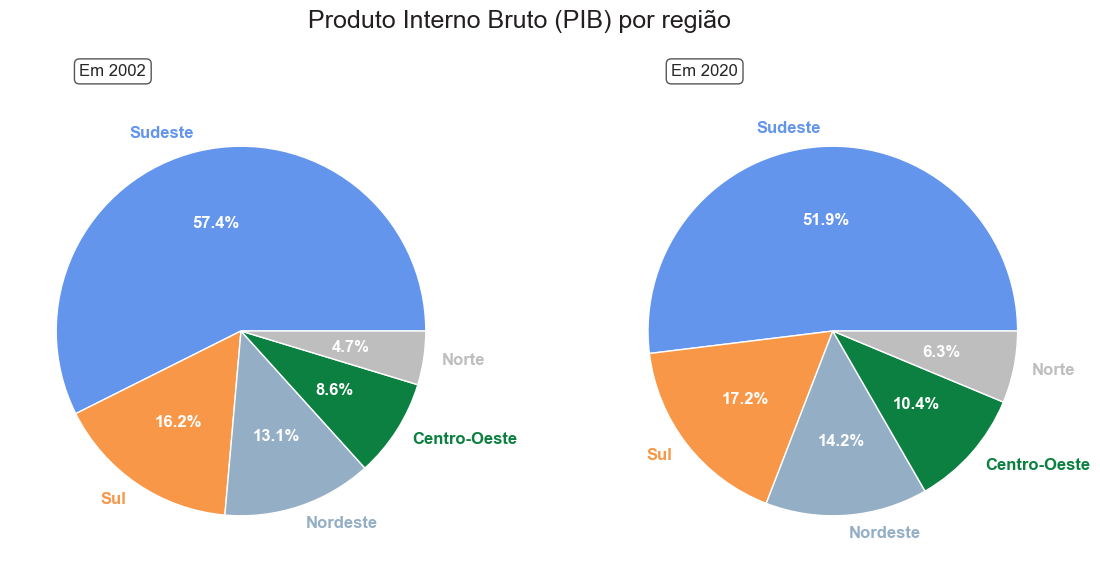

In [121]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

cores = [AZUL3, LARANJA1, AZUL5, VERDE1, CINZA5]

plt.suptitle('Produto Interno Bruto (PIB) por região',
             fontsize=18, color=CINZA1, y=1.03)

# Gráfico 1

ptc, text, _ = axs[0].pie(data=df_pib_2002, x='pib',
                          labels=df_pib_2002.index,
                          autopct=r'%.1f%%', pctdistance=0.6,
                          textprops=config,
                          colors=cores)

axs[0].annotate(text='Em 2002', xy=(50, 350), xycoords='axes points',
                size=12, bbox=dict(boxstyle='round', fc=BRANCO, ec=CINZA3))

for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

# Gráfico 2

ptc, text, _ = axs[1].pie(data=df_pib_2020, x='pib',
                          labels=df_pib_2020.index,
                          autopct='%.1f%%', pctdistance=0.6,
                          textprops=config,
                          colors=cores)

axs[1].annotate(text='Em 2020', xy=(50, 350), xycoords='axes points',
                size=12, bbox=dict(boxstyle='round', fc=BRANCO, ec=CINZA3))

for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())


plt.show()

In [122]:
df_mg_2020 = df_pib.query("ano == 2020")[['sigla_uf', 'pib']]

df_mg_2020.loc[df_mg_2020['sigla_uf'] == 'MG', 'sigla_uf'] = 'Minas Gerais'
df_mg_2020.loc[df_mg_2020['sigla_uf'] != 'Minas Gerais', 'sigla_uf'] = 'Outros'

df_mg_2020 = df_mg_2020.groupby(by='sigla_uf').agg('sum')

df_mg_2020

,pib
sigla_uf,
Minas Gerais,682786116407
Outros,6926810883612


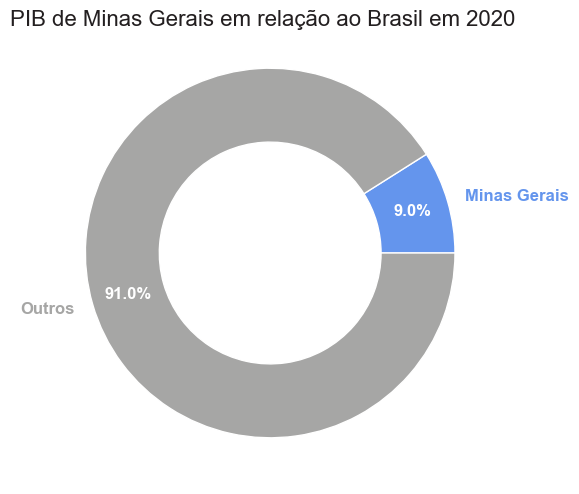

In [123]:
sns.set_style('dark')

fig, ax = plt.subplots(figsize=(6, 6))

cores = [AZUL3, CINZA4]

plt.suptitle('PIB de Minas Gerais em relação ao Brasil em 2020',
             fontsize=16, color=CINZA1, y=0.90)

ptc, text, _ = ax.pie(data=df_mg_2020,
                      x='pib', labels=df_mg_2020.index,
                      autopct=r'%.1f%%', startangle=0,
                      pctdistance=0.8, wedgeprops={'width': 0.4},
                      textprops=dict(size=12, fontweight='bold',
                                     color=BRANCO),
                      colors=cores)

for i, p in enumerate(ptc):
    text[i].set_color(p.get_facecolor())

plt.show()

In [124]:
bahia = df_pib.query(
    "sigla_uf == 'BA' and ano == 2020"
)[['pib', 'impostos_liquidos', 'va']]

bahia = bahia.rename(columns={'pib': 'PIB',
                      'impostos_liquidos': 'Impostos Líquidos',
                      'va': 'Valor Adicionado Bruto'})

bahia

,PIB,Impostos Líquidos,Valor Adicionado Bruto
303,305320812691,37094030606,268226782074


In [125]:
bahia = bahia.melt(var_name='Indicadores', value_name='Valores')

bahia.loc[
    bahia['Indicadores'] == 'Impostos Líquidos', 'Valores'
] = bahia['Valores'] * (-1)

bahia

,Indicadores,Valores
0,PIB,305320812691
1,Impostos Líquidos,-37094030606
2,Valor Adicionado Bruto,268226782074


In [126]:
bahia['Valores_str'] = (bahia['Valores'] / 1e9).map('R$ {:,.2f} Bi'.format)
bahia['Medidas'] = ['absolute', 'relative', 'total']

bahia

,Indicadores,Valores,Valores_str,Medidas
0,PIB,305320812691,R$ 305.32 Bi,absolute
1,Impostos Líquidos,-37094030606,R$ -37.09 Bi,relative
2,Valor Adicionado Bruto,268226782074,R$ 268.23 Bi,total


In [127]:
# Gráfico de cascata

fig = go.Figure(go.Waterfall(name='', orientation='v', measure=bahia['Medidas'],
                             x=bahia['Indicadores'], y=bahia['Valores'],
                             textposition='inside',
                             connector_line={'color': CINZA3},
                             totals_marker={'color': AZUL3},
                             decreasing_marker={'color': VERMELHO1}))

# Personalização (perfumaria)

fig.add_annotation(x=bahia['Indicadores'][0], y=bahia['Valores'][0],
                   text=bahia['Valores_str'][0], showarrow=False,
                   xanchor='center', yanchor='top',
                   font=dict(color='white'))

fig.add_annotation(x=bahia['Indicadores'][1], y=bahia['Valores'][0],
                   text=bahia['Valores_str'][1], showarrow=False,
                   xanchor='center', yanchor='top',
                   font=dict(color='white'))

fig.add_annotation(x=bahia['Indicadores'][2], y=bahia['Valores'][2],
                   text=bahia['Valores_str'][2], showarrow=False,
                   xanchor='center', yanchor='top',
                   font=dict(color='white'))

fig.update_layout(width=800, height=500, font_family='DejaVu Sans',
                  font_size=15, font=dict(color='black'), title_font_color=CINZA1,
                  title_font_size=24, title_text='Distribuição do Produto interno Bruto (PIB) da Bahia em 2020' + 
                  '<br><sup size=1 style="color:#555655">Impostos líquidos e Valores' + ' Adicionados Brutos de bens e serviços (em bilhões de reais)</sup>', plot_bgcolor=BRANCO, yaxis_range=[0, 380e9],
                  hovermode='closest')

fig.update_yaxes(showticklabels=False)

fig.add_annotation(text='Fonte dos dados: <a href="https://sidra.ibge.gov.br/pesquisa/pib-munic/tabelas">Produto Interno Bruto | IBGE</a>',
                   align="left", xref="paper", yref = "paper", x=1, y=-0.2, showarrow=False)

fig.show()

In [128]:
anos = [x for x in range(2010, 2020 + 1)]

rio = df_pib.query("sigla_uf == 'RJ' and ano == @anos")[['ano', 'pib']]
rio = rio.reset_index(drop=True)
rio

,ano,pib
0,2010,449858101109
1,2011,512767904769
2,2012,574884973130
3,2013,628226069362
4,2014,671076844311
5,2015,659138951833
6,2016,640401206447
7,2017,671605668055
8,2018,758859046865
9,2019,779927917084


In [129]:
rio['variacao_pib'] = rio['pib'].diff().fillna(rio['pib']).astype('Int64')

rio['Medidas'] = ['absolute'] + ['relative'] * 10

rio

,ano,pib,variacao_pib,Medidas
0,2010,449858101109,449858101109,absolute
1,2011,512767904769,62909803660,relative
2,2012,574884973130,62117068361,relative
3,2013,628226069362,53341096232,relative
4,2014,671076844311,42850774949,relative
5,2015,659138951833,-11937892478,relative
6,2016,640401206447,-18737745386,relative
7,2017,671605668055,31204461608,relative
8,2018,758859046865,87253378810,relative
9,2019,779927917084,21068870219,relative


In [ ]:
atualizacao = pd.Series({'ano': 'Total',
                         'pib': rio['pib'].values[-1],
                         'variacao_pib': rio['pib'].values[-1],
                         'Medidas': "total"}).to_frame().T

rio = pd.concat([rio, atualizacao],
                axis=0, ignore_index=True)
rio = rio.drop(columns=['pib'])

rio["variacao_pib_texto"] = (rio["variacao_pib"]/1e9).map('R$ {:,.2f} Bi'.format)

rio.rename(columns={"ano":"Ano", "variacao_pib": "Variação do PIB", "variacao_pib_texto":"Variação do PIB (em texto)"}, inplace=True)

rio.head()

,Ano,Variação do PIB,Medidas,Variação do PIB (em texto)
0,2010,449858101109,absolute,R$ 449.86 Bi
1,2011,62909803660,relative,R$ 62.91 Bi
2,2012,62117068361,relative,R$ 62.12 Bi
3,2013,53341096232,relative,R$ 53.34 Bi
4,2014,42850774949,relative,R$ 42.85 Bi
5,2015,-11937892478,relative,R$ -11.94 Bi
6,2016,-18737745386,relative,R$ -18.74 Bi
7,2017,31204461608,relative,R$ 31.20 Bi
8,2018,87253378810,relative,R$ 87.25 Bi
9,2019,21068870219,relative,R$ 21.07 Bi


In [132]:
fig = go.Figure(
    go.Waterfall(name='', orientation='v', measure=rio['Medidas'],
                 y=rio['Variação do PIB'], text=rio['Variação do PIB (em texto)'],
                 textposition='outside', connector_line=dict(color=CINZA3),
                 totals_marker=dict(color=AZUL3),
                 increasing_marker=dict(color=VERDE1),
                 decreasing_marker=dict(color=VERMELHO1))
)

fig.update_layout(width=1300, height=600, font_family='DejaVu Sans',
                  font_size=15, font_color=CINZA2, title_font_color=CINZA1,
                  title_font_size=24,
                  title_text='Variação do Produto Interno Bruto (PIB) do Rio de Janeiro<br>De 2010 a 2020 (em bilhões de reais)',
                  plot_bgcolor=BRANCO, yaxis_range=[0, 850e9])

fig.update_yaxes(showticklabels=False)

fig.update_xaxes(tickmode='array', tickvals=np.arange(0, 12),
                 ticktext=rio['Ano'])

fig.update_traces(hovertemplate='<b>%{x}</b> = %{text}')

fig.show()